In [1]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
!pip install pandas nltk pymystem3 matplotlib seaborn wordcloud razdel -q

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from pymystem3 import Mystem
import nltk
import razdel  # –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ —Ä—É—Å—Å–∫–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤ nltk
print("–ó–∞–≥—Ä—É–∑–∫–∞ —Ä–µ—Å—É—Ä—Å–æ–≤ NLTK...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ñ–∞–π–ª–∞
file_path = '/content/vk_all_themes_20250428_181200.csv'
if not os.path.exists(file_path):
    print(f"–§–∞–π–ª {file_path} –Ω–µ –Ω–∞–π–¥–µ–Ω.")
else:
    print(f"–§–∞–π–ª {file_path} –Ω–∞–π–¥–µ–Ω.")

–ó–∞–≥—Ä—É–∑–∫–∞ —Ä–µ—Å—É—Ä—Å–æ–≤ NLTK...
–§–∞–π–ª /content/vk_all_themes_20250428_181200.csv –Ω–∞–π–¥–µ–Ω.


In [2]:
# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
print("–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö...")
df = pd.read_csv(file_path)

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –∏ –±–∞–∑–æ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:")
print(df.head())

print("\n–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
print(df.info())

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
theme_counts = df['theme'].value_counts()
print(theme_counts)

–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö...

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:
   post_id  owner_id        date    date_str  \
0    58626 -57481907  1714244440  2024-04-27   
1    58623 -57481907  1714234542  2024-04-27   
2    58618 -57481907  1714224342  2024-04-27   
3    58616 -57481907  1714223143  2024-04-27   
4    58614 -57481907  1714221944  2024-04-27   

                                                text  likes  reposts  \
0  –ù–∞ –≤—Å–µ—Ä–æ—Å—Å–∏–π—Å–∫–æ–º —Å—ä–µ–∑–¥–µ –õ–î–ü–† –µ–µ –ª–∏–¥–µ—Ä—ã –ø—Ä–æ–≤–æ–∑–≥...      2        1   
1  –£–≤–∞–∂–∞—Ç—å —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω—ã–µ —Ü–µ–Ω–Ω–æ—Å—Ç–∏ –∏ –Ω–µ –≤–º–µ—à–∏–≤–∞—Ç—å—Å—è...      6        0   
2  –í –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –¥–µ–ø—É—Ç–∞—Ç–∞ –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å–Ω–æ–≥–æ —Å–æ–±—Ä–∞–Ω–∏—è...      5        3   
3  –ö—É—Ä–≥–∞–Ω—Å–∫–∞—è –≥–æ—Ä–æ–¥—Å–∫–∞—è –¥—É–º–∞ –Ω–∞ –≤–Ω–µ–æ—á–µ—Ä–µ–¥–Ω–æ–º –∑–∞—Å–µ...      0        1   
4  –ß–ª–µ–Ω –°–æ–≤–µ—Ç–∞ —Ñ–µ–¥–µ—Ä–∞—Ü–∏–∏ –æ—Ç –ö—Ä—ã–º–∞ –°–µ—Ä–≥–µ–π –¶–µ–∫–æ–≤ (¬´...      1        1   

In [3]:
# 2. –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
def clean_text(text):
    """–û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –æ—Ç URL, HTML-—Ç–µ–≥–æ–≤, –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤"""
    if isinstance(text, str):
        # –£–¥–∞–ª–µ–Ω–∏–µ URL
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # –£–¥–∞–ª–µ–Ω–∏–µ HTML-—Ç–µ–≥–æ–≤
        text = re.sub(r'<.*?>', '', text)
        # –£–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —Ü–∏—Ñ—Ä
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', ' ', text)
        # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
        text = text.lower()
        # –£–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# –ó–∞–≥—Ä—É–∑–∫–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
russian_stopwords = set(stopwords.words('russian'))

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
additional_stopwords = {'—ç—Ç–æ', '–∫–æ—Ç–æ—Ä—ã–π', '—Ç–∞–∫–∂–µ', '–≤–µ—Å—å', '—Å–≤–æ–π', '–Ω–∞—à', '—Å–∞–º—ã–π', '–µ—â—ë', '–æ—á–µ–Ω—å',
                       '—Ç–∞–∫–æ–π', '–±–æ–ª–µ–µ', '–≤—Å–µ–≥–æ', '–Ω–µ–≥–æ', '–Ω–µ—é', '–º–æ—á—å', '–ø—Ä–æ—Å—Ç–æ', '–±—ã—Ç—å', '—Å—Ç–∞—Ç—å',
                       '–æ–¥–∏–Ω', '–¥–≤–∞', '—Ç—Ä–∏', '—á–µ–ª–æ–≤–µ–∫', '–≥–æ–¥', '–¥–µ–Ω—å', '–≤—Ä–µ–º—è'}
russian_stopwords.update(additional_stopwords)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–∞ Mystem
mystem = Mystem()

def preprocess_text(text):
    """–ü–æ–ª–Ω–∞—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞: –æ—á–∏—Å—Ç–∫–∞, —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è, —É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è"""
    if not isinstance(text, str) or text == "":
        return []

    # –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
    clean = clean_text(text)

    # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º razdel (–ª—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å —Ä—É—Å—Å–∫–∏–º —è–∑—ã–∫–æ–º)
    tokens = [token.text for token in razdel.tokenize(clean)]

    # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ –∫–æ—Ä–æ—Ç–∫–∏—Ö —Å–ª–æ–≤
    tokens = [token for token in tokens if token not in russian_stopwords and len(token) > 2]

    # –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é Mystem
    text_for_mystem = ' '.join(tokens)
    lemmas = [lemma for lemma in mystem.lemmatize(text_for_mystem) if lemma.strip() and lemma not in [' ', '\n']]

    return lemmas

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [4]:
# 3. –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
print("\n–ù–∞—á–∏–Ω–∞–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ–∫—Å—Ç–æ–≤...")
# –û–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–µ–±–æ–ª—å—à–∏–º–∏ –ø–∞–∫–µ—Ç–∞–º–∏ –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –ø–∞–º—è—Ç–∏
batch_size = 100
all_preprocessed = []

for i in tqdm(range(0, len(df), batch_size)):
    batch = df.iloc[i:i+batch_size]
    preprocessed_batch = batch['text'].apply(lambda x: preprocess_text(x))
    all_preprocessed.extend(preprocessed_batch)

df['preprocessed_text'] = all_preprocessed

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å–ª–∏—à–∫–æ–º –∫–æ—Ä–æ—Ç–∫–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤ (–º–µ–Ω–µ–µ 3 —Ç–æ–∫–µ–Ω–æ–≤ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏)
df_filtered = df[df['preprocessed_text'].apply(len) >= 3].copy()
print(f"–û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–æ {len(df) - len(df_filtered)} —Ç–µ–∫—Å—Ç–æ–≤ —Å –º–µ–Ω–µ–µ —á–µ–º 3 —Ç–æ–∫–µ–Ω–∞–º–∏.")


–ù–∞—á–∏–Ω–∞–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ–∫—Å—Ç–æ–≤...


  0%|          | 0/30 [00:00<?, ?it/s]

–û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–æ 0 —Ç–µ–∫—Å—Ç–æ–≤ —Å –º–µ–Ω–µ–µ —á–µ–º 3 —Ç–æ–∫–µ–Ω–∞–º–∏.


In [5]:
# 4. –ê–Ω–∞–ª–∏–∑ —á–∞—Å—Ç–æ—Ç—ã —Å–ª–æ–≤
all_lemmas = [lemma for text in df_filtered['preprocessed_text'] for lemma in text]
lemma_counts = Counter(all_lemmas)

print("\n–¢–æ–ø-20 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(lemma_counts.most_common(20))


–¢–æ–ø-20 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
[('–∏—Å—Ç–æ—Ä–∏—è', 1674), ('—Ä–æ—Å—Å–∏—è', 1589), ('–≥–æ–¥', 1483), ('–∫–Ω–∏–≥–∞', 1168), ('–ø–µ—Ä–≤—ã–π', 1146), ('—Ä—É—Å—Å–∫–∏–π', 1014), ('–∞–≤—Ç–æ—Ä', 954), ('–∫–æ—Ç–æ—Ä—ã–π', 927), ('alias', 866), ('–Ω–æ–≤—ã–π', 725), ('–æ–ø–∏—Å–∞–Ω–∏–µ', 717), ('–∏–∑–¥–∞–Ω–∏–µ', 634), ('–≤–æ–π–Ω–∞', 625), ('–≤–µ–∫', 620), ('–Ω–∞–∑–≤–∞–Ω–∏–µ', 604), ('—Ö—É–¥–æ–∂–Ω–∏–∫', 588), ('–≤–æ–µ–Ω–Ω—ã–π', 571), ('–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç', 561), ('club', 556), ('–≥–ª–∞–≤–∞', 555)]



–ò—Å–∫–ª—é—á–∞–µ–º 18892 —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ 5 —Ä–∞–∑ –∏–ª–∏ –±–æ–ª–µ–µ —á–µ–º –≤ 50.0% –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤.
–ü–æ—Å–ª–µ –≤—Ç–æ—Ä–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –æ—Å—Ç–∞–ª–æ—Å—å 2924 —Ç–µ–∫—Å—Ç–æ–≤.

–¢–æ–ø-20 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏:
[('–∏—Å—Ç–æ—Ä–∏—è', 1674), ('—Ä–æ—Å—Å–∏—è', 1589), ('–≥–æ–¥', 1483), ('–∫–Ω–∏–≥–∞', 1168), ('–ø–µ—Ä–≤—ã–π', 1146), ('—Ä—É—Å—Å–∫–∏–π', 1014), ('–∞–≤—Ç–æ—Ä', 954), ('–∫–æ—Ç–æ—Ä—ã–π', 927), ('alias', 865), ('–Ω–æ–≤—ã–π', 725), ('–æ–ø–∏—Å–∞–Ω–∏–µ', 717), ('–∏–∑–¥–∞–Ω–∏–µ', 634), ('–≤–æ–π–Ω–∞', 625), ('–≤–µ–∫', 620), ('–Ω–∞–∑–≤–∞–Ω–∏–µ', 604), ('–≤–æ–µ–Ω–Ω—ã–π', 571), ('—Ö—É–¥–æ–∂–Ω–∏–∫', 568), ('–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç', 561), ('club', 556), ('–≥–ª–∞–≤–∞', 555)]


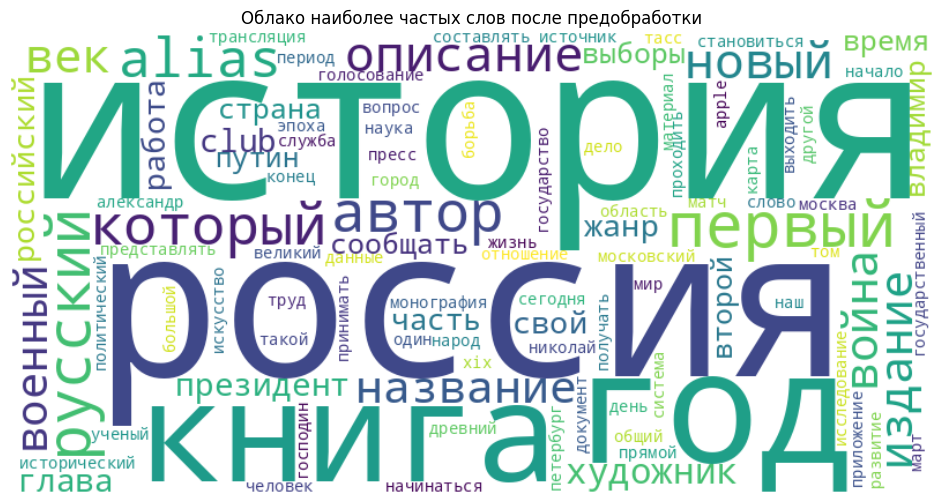

In [6]:
# 5. –£–¥–∞–ª–µ–Ω–∏–µ —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç—ã—Ö –∏ —Å–ª–∏—à–∫–æ–º —Ä–µ–¥–∫–∏—Ö —Å–ª–æ–≤
min_count = 5  # –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π
max_freq = 0.5  # –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö (–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)

# –ü–æ–ª—É—á–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ
doc_freq = {}
for text in df_filtered['preprocessed_text']:
    unique_lemmas = set(text)
    for lemma in unique_lemmas:
        doc_freq[lemma] = doc_freq.get(lemma, 0) + 1

# –ù–∞—Ö–æ–¥–∏–º —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å
n_docs = len(df_filtered)
lemmas_to_exclude = {lemma for lemma, count in lemma_counts.items()
                    if count < min_count or doc_freq.get(lemma, 0) / n_docs > max_freq}

print(f"\n–ò—Å–∫–ª—é—á–∞–µ–º {len(lemmas_to_exclude)} —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ {min_count} —Ä–∞–∑ –∏–ª–∏ –±–æ–ª–µ–µ —á–µ–º –≤ {max_freq*100}% –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤.")

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é –∫ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–∞–º
df_filtered['filtered_text'] = df_filtered['preprocessed_text'].apply(
    lambda text: [lemma for lemma in text if lemma not in lemmas_to_exclude]
)

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å–Ω–æ–≤–∞ –ø–æ –¥–ª–∏–Ω–µ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è —á–∞—Å—Ç—ã—Ö –∏ —Ä–µ–¥–∫–∏—Ö —Å–ª–æ–≤
df_filtered = df_filtered[df_filtered['filtered_text'].apply(len) >= 3].copy()
print(f"–ü–æ—Å–ª–µ –≤—Ç–æ—Ä–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –æ—Å—Ç–∞–ª–æ—Å—å {len(df_filtered)} —Ç–µ–∫—Å—Ç–æ–≤.")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–ª–∞–∫–∞ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
all_filtered_lemmas = [lemma for text in df_filtered['filtered_text'] for lemma in text]
filtered_lemma_counts = Counter(all_filtered_lemmas)

print("\n–¢–æ–ø-20 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏:")
print(filtered_lemma_counts.most_common(20))

# –°–æ–∑–¥–∞–µ–º –æ–±–ª–∞–∫–æ —Å–ª–æ–≤
try:
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=100,
                          colormap='viridis',
                          random_state=42,
                          contour_width=1
                          ).generate_from_frequencies(filtered_lemma_counts)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('–û–±–ª–∞–∫–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏')
    plt.show()
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤: {e}")


–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ /content/preprocessed_vk_data.csv

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
theme
–ø–æ–ª–∏—Ç–∏–∫–∞      500
–Ω–∞—É–∫–∞         500
–ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞    500
—Å–ø–æ—Ä—Ç         500
–∏—Å–∫—É—Å—Å—Ç–≤–æ     476
—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏    448
Name: count, dtype: int64


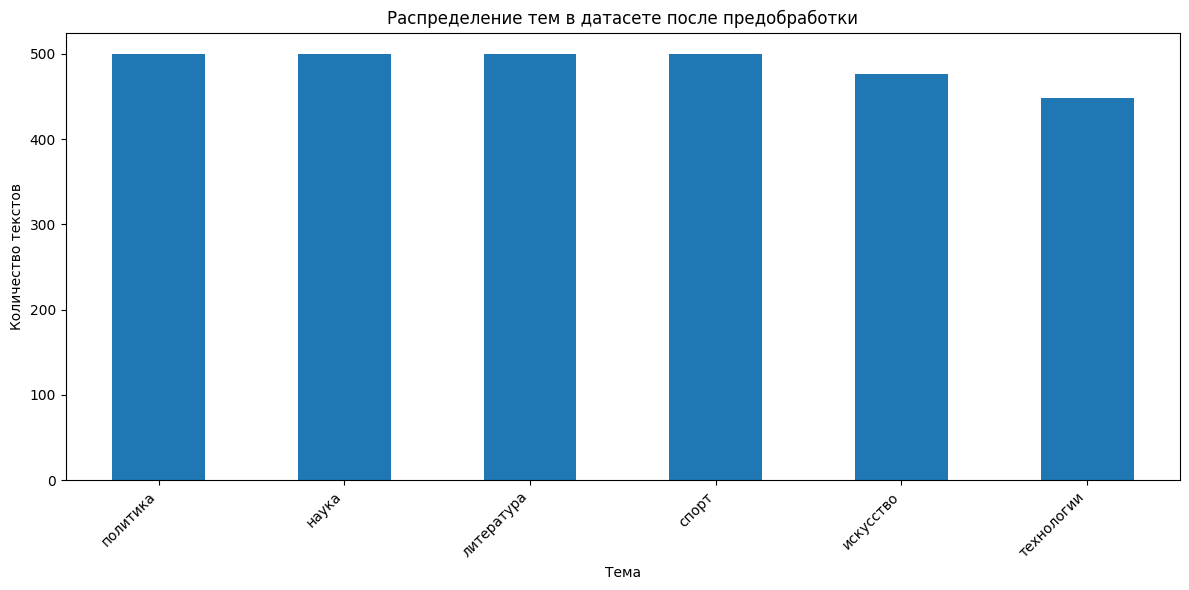

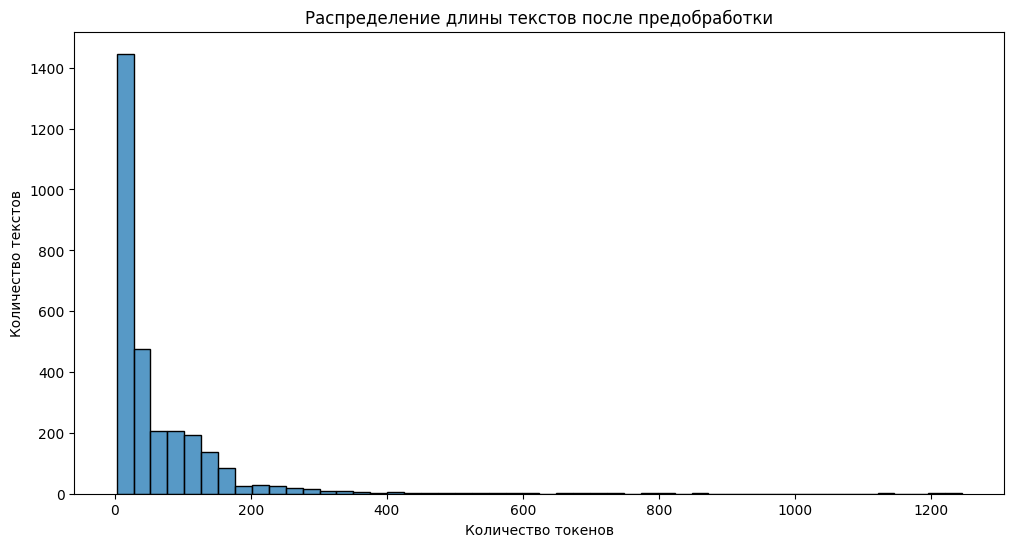


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
count    2924.000000
mean       63.757182
std        93.066576
min         3.000000
25%        18.000000
50%        28.000000
75%        85.250000
max      1246.000000
Name: token_count, dtype: float64

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º—É –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é...

–î–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–æ—Ä–º–∞—Ç–µ pickle.


In [7]:
# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
output_path = '/content/preprocessed_vk_data.csv'
df_filtered.to_csv(output_path, index=False)
print(f"\n–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_path}")

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:")
theme_counts_after = df_filtered['theme'].value_counts()
print(theme_counts_after)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏
plt.figure(figsize=(12, 6))
theme_counts_after.plot(kind='bar')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏')
plt.xlabel('–¢–µ–º–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–ª–∏–Ω–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏
df_filtered['token_count'] = df_filtered['filtered_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['token_count'], bins=50)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤')
plt.show()

print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(df_filtered['token_count'].describe())

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é —Ç–µ–º - —Å–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –∏ –∫–æ—Ä–ø—É—Å–∞ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
print("\n–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º—É –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é...")

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –≤ —Å—Ç—Ä–æ–∫–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
df_filtered['text_for_modeling'] = df_filtered['filtered_text'].apply(lambda x: ' '.join(x))

# –°–æ–∑–¥–∞–¥–∏–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å–ø–∏—Å–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
texts_for_modeling = df_filtered['filtered_text'].tolist()
themes = df_filtered['theme'].tolist()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è
preprocessed_data = {
    'texts': texts_for_modeling,
    'themes': themes
}

import pickle
with open('/content/preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("\n–î–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–æ—Ä–º–∞—Ç–µ pickle.")

# –ö—Ä–∞—Ç–∫–∏–π –≤—ã–≤–æ–¥ –ø–æ —ç—Ç–∞–ø—É –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö

## –í—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—è
1. –ó–∞–≥—Ä—É–∂–µ–Ω –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ 2950 —Ç–µ–∫—Å—Ç–æ–≤ —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ 6 —Ç–µ–º–∞—Ç–∏–∫–∞–º (–ø–æ–ª–∏—Ç–∏–∫–∞, –Ω–∞—É–∫–∞, –∏—Å–∫—É—Å—Å—Ç–≤–æ, –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞, —Å–ø–æ—Ä—Ç, —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏)
2. –ü—Ä–æ–≤–µ–¥–µ–Ω–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤:
   - –û—á–∏—Å—Ç–∫–∞ –æ—Ç URL, HTML-—Ç–µ–≥–æ–≤, –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏, —Ü–∏—Ñ—Ä
   - –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
   - –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ –º–∞–ª–æ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö —Å–ª–æ–≤
   - –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é pymystem3
   - –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ä–µ–¥–∫–∏—Ö (–º–µ–Ω–µ–µ 5 —É–ø–æ–º–∏–Ω–∞–Ω–∏–π) –∏ —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ (–≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è –±–æ–ª–µ–µ —á–µ–º –≤ 50% –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã
1. –ü–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ 2924 —Ç–µ–∫—Å—Ç–∞ (–æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–æ 26 —Ç–µ–∫—Å—Ç–æ–≤)
2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ç–µ–º–∞–º –æ—Å—Ç–∞–ª–æ—Å—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º, –Ω–µ–±–æ–ª—å—à–æ–µ —É–º–µ–Ω—å—à–µ–Ω–∏–µ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö "–∏—Å–∫—É—Å—Å—Ç–≤–æ" (476) –∏ "—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏" (448)
3. –°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ - 63.8 —Ç–æ–∫–µ–Ω–æ–≤, –º–µ–¥–∏–∞–Ω–Ω–∞—è - 28 —Ç–æ–∫–µ–Ω–æ–≤
4. –í—ã—è–≤–ª–µ–Ω—ã –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ—Ç–Ω—ã–µ —Å–ª–æ–≤–∞ –≤ –∫–æ—Ä–ø—É—Å–µ: "–∏—Å—Ç–æ—Ä–∏—è", "—Ä–æ—Å—Å–∏—è", "–≥–æ–¥", "–∫–Ω–∏–≥–∞", "–ø–µ—Ä–≤—ã–π"
5. –ò—Å–∫–ª—é—á–µ–Ω–æ 18892 —Å–ª–æ–≤–∞ —Å –Ω–∏–∑–∫–æ–π —á–∞—Å—Ç–æ—Ç–æ–π –∏–ª–∏ —Å–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç—å—é

## –ó–Ω–∞—á–∏–º–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π –∫–æ—Ä–ø—É—Å –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–µ—Ç–æ–¥–æ–≤ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è
2. –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö —Å–ª–æ–≤ –ø–æ–∑–≤–æ–ª–∏—Ç –ø–æ–≤—ã—Å–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–¥–µ–ª—è–µ–º—ã—Ö —Ç–µ–º
3. –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —É–ª—É—á—à–∏—Ç —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –∞–Ω–∞–ª–∏–∑–∞, –æ–±—ä–µ–¥–∏–Ω–∏–≤ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ñ–æ—Ä–º—ã –æ–¥–Ω–∏—Ö –∏ —Ç–µ—Ö –∂–µ —Å–ª–æ–≤
4. –°–æ–∑–¥–∞–Ω —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª–∏—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –∫ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º—É –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é

–î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–æ—Ä–º–∞—Ç–∞—Ö CSV –∏ pickle –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö —Å –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º–∏ –∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è.

In [9]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
!pip install pandas numpy scikit-learn matplotlib seaborn gensim pyldavis==2.1.2 -q

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...")
with open('/content/preprocessed_data.pkl', 'rb') as f:
    preprocessed_data = pickle.load(f)

texts = preprocessed_data['texts']  # –°–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤ —Ç–æ–∫–µ–Ω–æ–≤
themes = preprocessed_data['themes']  # –°–ø–∏—Å–æ–∫ —Ç–µ–º

# –¢–∞–∫–∂–µ –∑–∞–≥—Ä—É–∑–∏–º DataFrame –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
df = pd.read_csv('/content/preprocessed_vk_data.csv')

# –°–æ–∑–¥–∞–¥–∏–º —Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ø–∏—Å–∫–æ–≤ —Ç–æ–∫–µ–Ω–æ–≤ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏
text_strings = [' '.join(text) for text in texts]

–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...


In [11]:
# 2. –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è - —Å–æ–∑–¥–∞–Ω–∏–µ TF-IDF –∏ BoW –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π
print("–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö...")

# TF-IDF –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_strings)
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Bag-of-Words –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è (CountVectorizer)
count_vectorizer = CountVectorizer(max_features=5000)
bow_matrix = count_vectorizer.fit_transform(text_strings)
feature_names_bow = count_vectorizer.get_feature_names_out()

print(f"–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å TF-IDF –º–∞—Ç—Ä–∏—Ü—ã: {tfidf_matrix.shape}")
print(f"–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å BoW –º–∞—Ç—Ä–∏—Ü—ã: {bow_matrix.shape}")

–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö...
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å TF-IDF –º–∞—Ç—Ä–∏—Ü—ã: (2924, 5000)
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å BoW –º–∞—Ç—Ä–∏—Ü—ã: (2924, 5000)



=== LSA (Latent Semantic Analysis) ===
–û–±—É—á–µ–Ω–∏–µ LSA —Å 5 —Ç–µ–º–∞–º–∏...
  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.055
–û–±—É—á–µ–Ω–∏–µ LSA —Å 10 —Ç–µ–º–∞–º–∏...
  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.084
–û–±—É—á–µ–Ω–∏–µ LSA —Å 15 —Ç–µ–º–∞–º–∏...
  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.105
–û–±—É—á–µ–Ω–∏–µ LSA —Å 20 —Ç–µ–º–∞–º–∏...
  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.120
–û–±—É—á–µ–Ω–∏–µ LSA —Å 30 —Ç–µ–º–∞–º–∏...
  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.146


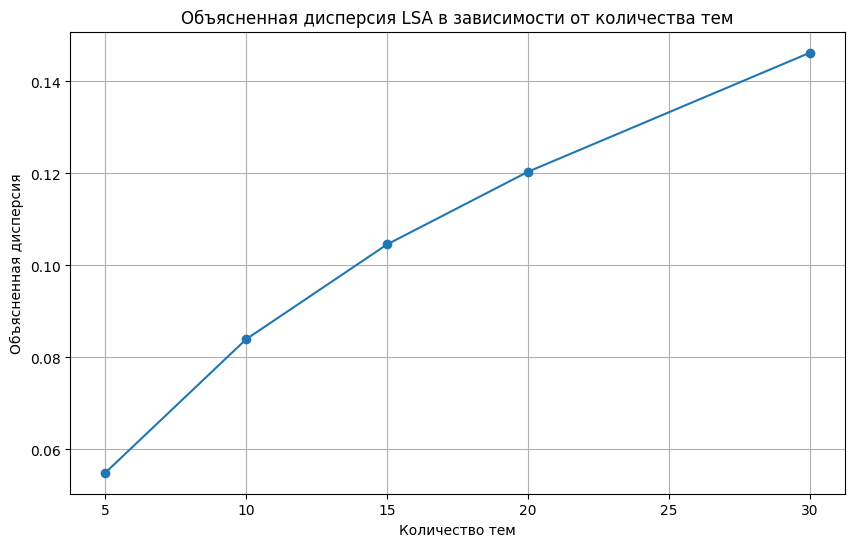

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LSA: 30 —Ç–µ–º, –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.146

–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LSA):
–¢–µ–º–∞ 1: club, —Ä–æ—Å—Å–∏—è, –º–∞—Ç—á, –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è, –ø—Ä—è–º–æ–π, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –ø–µ—Ä–≤—ã–π, –∏—Å—Ç–æ—Ä–∏—è, –≥–æ–¥, —Å–µ–≥–æ–¥–Ω—è
–¢–µ–º–∞ 2: —Ö—É–¥–æ–∂–Ω–∏–∫, –º–∞—Å–ª–æ, —Ö–æ–ª—Å—Ç, the, –º—É–∑–µ–π, –∏—Å—Ç–æ—Ä–∏—è, –≥–æ–¥, —Ä—É—Å—Å–∫–∏–π, –∫–Ω–∏–≥–∞, —á–∞—Å—Ç–Ω—ã–π
–¢–µ–º–∞ 3: —Ö—É–¥–æ–∂–Ω–∏–∫, –º–∞—Å–ª–æ, —Ö–æ–ª—Å—Ç, club, the, –º–∞—Ç—á, –ø—Ä—è–º–æ–π, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è, –º—É–∑–µ–π
–¢–µ–º–∞ 4: –≤—ã–±–æ—Ä—ã, –ø—É—Ç–∏–Ω, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ, –≤–ª–∞–¥–∏–º–∏—Ä, —è–≤–∫–∞, –≥–æ–ª–æ—Å, —Å–ª—É—Ü–∫–∏–π, —Ü–∏–∫, —Ö–∞—Ä–∏—Ç–æ–Ω–æ–≤
–¢–µ–º–∞ 5: alias, —Ç–∞—Å—Å, —Ä–æ—Å–∫–æ—Å–º–æ—Å, –∫–æ–Ω–æ–Ω–µ–Ω–∫–æ, –æ–ª–µ–≥, —Å–æ–æ–±—â–∞—Ç—å, haier, –∫–æ—Å–º–æ–Ω–∞–≤—Ç, —Å–ª—É–∂–±–∞, –ø—Ä–µ—Å—Å
–¢–µ–º–∞ 6: –∫–æ–Ω–æ–Ω–µ–Ω–∫–æ, —Ä–æ—Å–∫–æ—Å–º–æ—Å, –æ–ª–µ–≥, —Ç–∞—Å—Å, –∫–æ—Å–º–æ–Ω–∞–≤—Ç, –º–∫—Å, —Ç–∞—

In [12]:
# 3. LSA (Latent Semantic Analysis)
print("\n=== LSA (Latent Semantic Analysis) ===")
def evaluate_lsa(n_topics_range, tfidf_matrix, feature_names, top_n_words=10):
    results = []

    for n_topics in n_topics_range:
        print(f"–û–±—É—á–µ–Ω–∏–µ LSA —Å {n_topics} —Ç–µ–º–∞–º–∏...")
        lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
        lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

        explained_variance = lsa_model.explained_variance_ratio_.sum()

        # –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–º (–∫–æ–º–ø–æ–Ω–µ–Ω—Ç)
        topics = []
        for topic_idx, topic in enumerate(lsa_model.components_):
            top_features_idx = topic.argsort()[:-top_n_words-1:-1]
            top_features = [feature_names[i] for i in top_features_idx]
            topics.append(top_features)

        results.append({
            'n_topics': n_topics,
            'model': lsa_model,
            'explained_variance': explained_variance,
            'topics': topics
        })

        print(f"  –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: {explained_variance:.3f}")

    return results

n_topics_range = [5, 10, 15, 20, 30]
lsa_results = evaluate_lsa(n_topics_range, tfidf_matrix, feature_names_tfidf)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—ä—è—Å–Ω–µ–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏
plt.figure(figsize=(10, 6))
plt.plot([result['n_topics'] for result in lsa_results],
         [result['explained_variance'] for result in lsa_results],
         marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º')
plt.ylabel('–û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è')
plt.title('–û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è LSA –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º')
plt.grid(True)
plt.show()

# –í—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å LSA
best_lsa = max(lsa_results, key=lambda x: x['explained_variance'])
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LSA: {best_lsa['n_topics']} —Ç–µ–º, –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: {best_lsa['explained_variance']:.3f}")

# –í—ã–≤–µ–¥–µ–º —Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
print("\n–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LSA):")
for topic_idx, topic_words in enumerate(best_lsa['topics']):
    print(f"–¢–µ–º–∞ {topic_idx+1}: {', '.join(topic_words)}")


=== LDA (Latent Dirichlet Allocation) —Å scikit-learn ===
–û–±—É—á–µ–Ω–∏–µ LDA —Å 5 —Ç–µ–º–∞–º–∏...
  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1533.96
–û–±—É—á–µ–Ω–∏–µ LDA —Å 10 —Ç–µ–º–∞–º–∏...
  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1590.43
–û–±—É—á–µ–Ω–∏–µ LDA —Å 15 —Ç–µ–º–∞–º–∏...
  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1634.18
–û–±—É—á–µ–Ω–∏–µ LDA —Å 20 —Ç–µ–º–∞–º–∏...
  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1696.36
–û–±—É—á–µ–Ω–∏–µ LDA —Å 30 —Ç–µ–º–∞–º–∏...
  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1766.53


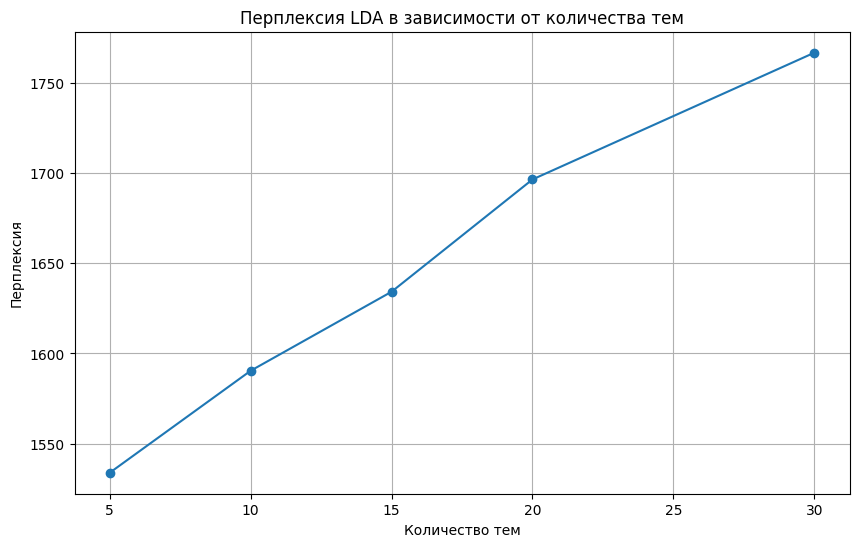

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LDA scikit-learn: 5 —Ç–µ–º, –ø–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1533.96

–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LDA scikit-learn):
–¢–µ–º–∞ 1: alias, –Ω–æ–≤—ã–π, apple, iphone, –∫–æ—Ç–æ—Ä—ã–π, —Å–æ–æ–±—â–∞—Ç—å, pro, haier, —Ç–∞—Å—Å, –≥–æ–¥
–¢–µ–º–∞ 2: —Ö—É–¥–æ–∂–Ω–∏–∫, –º–∞—Å–ª–æ, —Ö–æ–ª—Å—Ç, –º—É–∑–µ–π, the, —Å–∞–π—Ç, –∑–∞–∫–∞–∑, alias, –≤–∏–¥, –æ–ª–µ–≥
–¢–µ–º–∞ 3: –∏—Å—Ç–æ—Ä–∏—è, –∫–Ω–∏–≥–∞, —Ä—É—Å—Å–∫–∏–π, –∞–≤—Ç–æ—Ä, –≥–æ–¥, –ø–µ—Ä–≤—ã–π, –æ–ø–∏—Å–∞–Ω–∏–µ, —Ä–æ—Å—Å–∏—è, –∏–∑–¥–∞–Ω–∏–µ, –≤–µ–∫
–¢–µ–º–∞ 4: —Ä–æ—Å—Å–∏—è, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, –≥–æ–¥, –≤—ã–±–æ—Ä—ã, –≤–ª–∞–¥–∏–º–∏—Ä, –ø—É—Ç–∏–Ω, –≥–ª–∞–≤–∞, —Å–æ–æ–±—â–∞—Ç—å, –∫–æ—Ç–æ—Ä—ã–π, –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ
–¢–µ–º–∞ 5: club, –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –ø—Ä—è–º–æ–π, –º–∞—Ç—á, —Å–µ–≥–æ–¥–Ω—è, –ø–µ—Ä–≤—ã–π, –º–æ—Å–∫–æ–≤—Å–∫–∏–π, –∫–æ–º–∞–Ω–¥–∞, —ç—Ñ–∏—Ä


In [13]:
# 4. LDA (Latent Dirichlet Allocation) —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º scikit-learn
print("\n=== LDA (Latent Dirichlet Allocation) —Å scikit-learn ===")
def evaluate_lda_sklearn(n_topics_range, bow_matrix, feature_names, top_n_words=10):
    results = []

    for n_topics in n_topics_range:
        print(f"–û–±—É—á–µ–Ω–∏–µ LDA —Å {n_topics} —Ç–µ–º–∞–º–∏...")
        lda_model = LatentDirichletAllocation(
            n_components=n_topics,
            max_iter=25,
            random_state=42,
            learning_method='online',
            batch_size=128,
            n_jobs=-1
        )
        lda_matrix = lda_model.fit_transform(bow_matrix)

        perplexity = lda_model.perplexity(bow_matrix)

        # –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
        topics = []
        for topic_idx, topic in enumerate(lda_model.components_):
            top_features_idx = topic.argsort()[:-top_n_words-1:-1]
            top_features = [feature_names[i] for i in top_features_idx]
            topics.append(top_features)

        results.append({
            'n_topics': n_topics,
            'model': lda_model,
            'perplexity': perplexity,
            'topics': topics
        })

        print(f"  –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: {perplexity:.2f}")

    return results

lda_sklearn_results = evaluate_lda_sklearn(n_topics_range, bow_matrix, feature_names_bow)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–ø–ª–µ–∫—Å–∏–∏
plt.figure(figsize=(10, 6))
plt.plot([result['n_topics'] for result in lda_sklearn_results],
         [result['perplexity'] for result in lda_sklearn_results],
         marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º')
plt.ylabel('–ü–µ—Ä–ø–ª–µ–∫—Å–∏—è')
plt.title('–ü–µ—Ä–ø–ª–µ–∫—Å–∏—è LDA –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º')
plt.grid(True)
plt.show()

# –í—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å LDA (–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –ø–µ—Ä–ø–ª–µ–∫—Å–∏—è)
best_lda_sklearn = min(lda_sklearn_results, key=lambda x: x['perplexity'])
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LDA scikit-learn: {best_lda_sklearn['n_topics']} —Ç–µ–º, –ø–µ—Ä–ø–ª–µ–∫—Å–∏—è: {best_lda_sklearn['perplexity']:.2f}")

# –í—ã–≤–µ–¥–µ–º —Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
print("\n–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LDA scikit-learn):")
for topic_idx, topic_words in enumerate(best_lda_sklearn['topics']):
    print(f"–¢–µ–º–∞ {topic_idx+1}: {', '.join(topic_words)}")


=== LDA —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim ===
–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è gensim...
–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å 5 —Ç–µ–º–∞–º–∏...
  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.4805
–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å 10 —Ç–µ–º–∞–º–∏...
  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.3616
–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å 15 —Ç–µ–º–∞–º–∏...
  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.4066
–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å 20 —Ç–µ–º–∞–º–∏...
  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.3293
–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å 30 —Ç–µ–º–∞–º–∏...
  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.3742


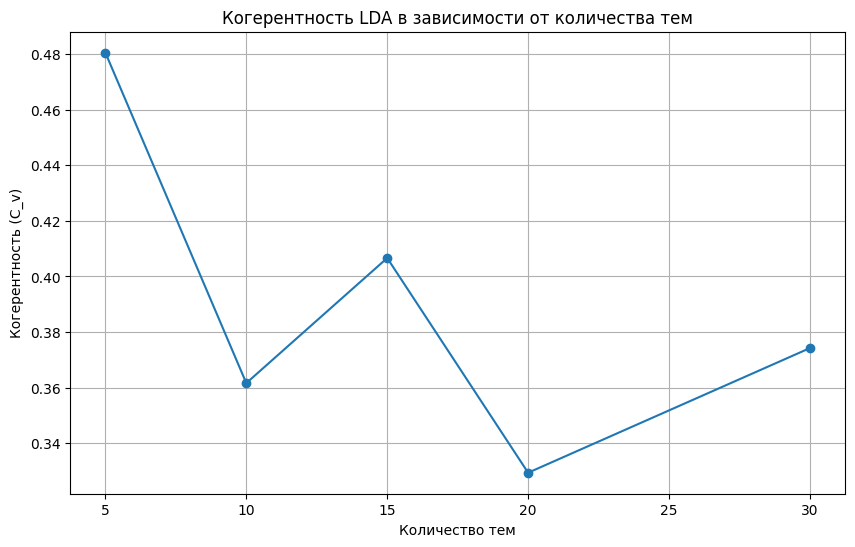

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LDA gensim: 5 —Ç–µ–º, –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: 0.4805

–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LDA gensim):
–¢–µ–º–∞ 1: –≤–æ–π–Ω–∞, –æ–ø–∏—Å–∞–Ω–∏–µ, –Ω–∞–∑–≤–∞–Ω–∏–µ, —Ä–æ—Å—Å–∏—è, –≤–æ–µ–Ω–Ω—ã–π, –º–∏—Ä, –≥–æ–¥, –∫–æ—Ç–æ—Ä—ã–π, –Ω–∞—á–∞–ª–æ, —Å–æ–±—ã—Ç–∏–µ
–¢–µ–º–∞ 2: club, –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –ø—Ä—è–º–æ–π, –º–∞—Ç—á, —Å–µ–≥–æ–¥–Ω—è, —ç—Ñ–∏—Ä, –∫–æ–º–∞–Ω–¥–∞, –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å, –º–æ—Å–∫–æ–≤—Å–∫–∏–π
–¢–µ–º–∞ 3: —Ä—É—Å—Å–∫–∏–π, –∏—Å—Ç–æ—Ä–∏—è, –∞–≤—Ç–æ—Ä, –¥—Ä–µ–≤–Ω–∏–π, —Ç—Ä—É–¥, xix, –Ω–∞—Ä–æ–¥, –∏–∑–¥–∞–Ω–∏–µ, –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, –∂–∏–∑–Ω—å
–¢–µ–º–∞ 4: –≤–µ–∫, —Ä—É—Å—Å–∫–∏–π, —Ö—É–¥–æ–∂–Ω–∏–∫, –∏—Å–∫—É—Å—Å—Ç–≤–æ, –≥–æ–¥, –≤—Ä–µ–º—è, alias, –∞–∫–∞–¥–µ–º–∏—è, —Ñ—Ä–∞–Ω—Ü–∏—è, –∑–µ–º–ª—è
–¢–µ–º–∞ 5: –∫–Ω–∏–≥–∞, –∏—Å—Ç–æ—Ä–∏—è, –ø–µ—Ä–≤—ã–π, –∞–≤—Ç–æ—Ä, –≥–æ–¥, —Ä–æ—Å—Å–∏—è, –∏–∑–¥–∞–Ω–∏–µ, –≤—Ç–æ—Ä–æ–π, –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π, –≥–ª–∞–≤–∞


In [14]:
# 5. LDA —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim (—Å —Ä–∞—Å—á–µ—Ç–æ–º –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏)
print("\n=== LDA —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim ===")
def prepare_gensim_data(texts):
    # –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å gensim
    dictionary = Dictionary(texts)

    # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # –°–æ–∑–¥–∞–µ–º –∫–æ—Ä–ø—É—Å (Bag of Words)
    corpus = [dictionary.doc2bow(text) for text in texts]

    return dictionary, corpus

print("–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è gensim...")
dictionary, corpus = prepare_gensim_data(texts)

def evaluate_lda_gensim(n_topics_range, texts, dictionary, corpus, top_n_words=10):
    results = []

    for n_topics in n_topics_range:
        print(f"–û–±—É—á–µ–Ω–∏–µ LDA gensim —Å {n_topics} —Ç–µ–º–∞–º–∏...")
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=n_topics,
            random_state=42,
            chunksize=100,
            passes=10,
            alpha='auto',
            eta='auto'
        )

        # –†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏
        coherence_model_cv = CoherenceModel(
            model=lda_model,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_cv = coherence_model_cv.get_coherence()

        # –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–º
        topics = []
        for topic_id in range(n_topics):
            top_words = lda_model.show_topic(topic_id, topn=top_n_words)
            topics.append([word for word, prob in top_words])

        results.append({
            'n_topics': n_topics,
            'model': lda_model,
            'coherence': coherence_cv,
            'topics': topics
        })

        print(f"  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: {coherence_cv:.4f}")

    return results

lda_gensim_results = evaluate_lda_gensim(n_topics_range, texts, dictionary, corpus)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏
plt.figure(figsize=(10, 6))
plt.plot([result['n_topics'] for result in lda_gensim_results],
         [result['coherence'] for result in lda_gensim_results],
         marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º')
plt.ylabel('–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å (C_v)')
plt.title('–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LDA –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º')
plt.grid(True)
plt.show()

# –í—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å LDA gensim –ø–æ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏
best_lda_gensim = max(lda_gensim_results, key=lambda x: x['coherence'])
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å LDA gensim: {best_lda_gensim['n_topics']} —Ç–µ–º, –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å: {best_lda_gensim['coherence']:.4f}")

# –í—ã–≤–µ–¥–µ–º —Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
print("\n–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (LDA gensim):")
for topic_idx, topic_words in enumerate(best_lda_gensim['topics']):
    print(f"–¢–µ–º–∞ {topic_idx+1}: {', '.join(topic_words)}")

In [15]:
# 6. pLSA (Probabilistic Latent Semantic Analysis)
print("\n=== pLSA (Probabilistic Latent Semantic Analysis) ===")
class SimplePLSA:
    def __init__(self, n_topics, max_iter=100, random_state=42):
        self.n_topics = n_topics
        self.max_iter = max_iter
        self.random_state = random_state
        np.random.seed(random_state)

    def fit(self, X):
        """X: –¥–æ–∫—É–º–µ–Ω—Ç-—Ç–µ—Ä–º –º–∞—Ç—Ä–∏—Ü–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏–∑ CountVectorizer)"""
        n_docs, n_terms = X.shape

        # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
        # P(z|d) - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º –ø–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞–º
        p_z_d = np.random.rand(n_docs, self.n_topics)
        p_z_d = p_z_d / p_z_d.sum(axis=1, keepdims=True)

        # P(w|z) - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª–æ–≤ –ø–æ —Ç–µ–º–∞–º
        p_w_z = np.random.rand(self.n_topics, n_terms)
        p_w_z = p_w_z / p_w_z.sum(axis=1, keepdims=True)

        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –≤ –º–∞—Å—Å–∏–≤ (–µ—Å–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ)
        X_array = X.toarray() if hasattr(X, 'toarray') else X

        # EM-–∞–ª–≥–æ—Ä–∏—Ç–º
        for iteration in range(self.max_iter):
            # E-—à–∞–≥: –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ P(z|d,w)
            p_z_dw = np.zeros((n_docs, n_terms, self.n_topics))

            for d in range(n_docs):
                for w in range(n_terms):
                    if X_array[d, w] > 0:
                        # P(z|d) * P(w|z)
                        p_z_given_dw = p_z_d[d, :] * p_w_z[:, w]
                        # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
                        if p_z_given_dw.sum() > 0:
                            p_z_dw[d, w, :] = p_z_given_dw / p_z_given_dw.sum()

            # M-—à–∞–≥: –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
            # –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ P(w|z)
            for z in range(self.n_topics):
                for w in range(n_terms):
                    p_w_z[z, w] = np.sum(X_array[:, w] * p_z_dw[:, w, z])

                # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
                if p_w_z[z, :].sum() > 0:
                    p_w_z[z, :] = p_w_z[z, :] / p_w_z[z, :].sum()

            # –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ P(z|d)
            for d in range(n_docs):
                for z in range(self.n_topics):
                    p_z_d[d, z] = np.sum(X_array[d, :] * p_z_dw[d, :, z])

                # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
                if p_z_d[d, :].sum() > 0:
                    p_z_d[d, :] = p_z_d[d, :] / p_z_d[d, :].sum()

            if iteration % 10 == 0:
                print(f"  –ò—Ç–µ—Ä–∞—Ü–∏—è {iteration}")

        self.p_w_z = p_w_z
        self.p_z_d = p_z_d
        return self

    def get_topics(self, feature_names, top_n=10):
        """–ü–æ–ª—É—á–∏—Ç—å —Ç–æ–ø-N —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã"""
        topics = []
        for z in range(self.n_topics):
            # –ò–Ω–¥–µ–∫—Å—ã —Ç–æ–ø-N —Å–ª–æ–≤ –¥–ª—è —Ç–µ–º—ã z
            top_indices = np.argsort(self.p_w_z[z, :])[::-1][:top_n]
            topics.append([feature_names[i] for i in top_indices])
        return topics

# –û—Ü–µ–Ω–∏–º pLSA —Ç–æ–ª—å–∫–æ –¥–ª—è 5 —Ç–µ–º –∏–∑-–∑–∞ –≤—ã—Å–æ–∫–æ–π –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ–π —Å–ª–æ–∂–Ω–æ—Å—Ç–∏
print("–û–±—É—á–µ–Ω–∏–µ pLSA (–º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è)...")
# –£–º–µ–Ω—å—à–∏–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è
small_vectorizer = CountVectorizer(max_features=1000)
bow_matrix_small = small_vectorizer.fit_transform(text_strings)
feature_names_small = small_vectorizer.get_feature_names_out()

plsa_model = SimplePLSA(n_topics=5, max_iter=30)
plsa_model.fit(bow_matrix_small)

plsa_topics = plsa_model.get_topics(feature_names_small)
print("\n–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (pLSA):")
for topic_idx, topic_words in enumerate(plsa_topics):
    print(f"–¢–µ–º–∞ {topic_idx+1}: {', '.join(topic_words)}")


=== pLSA (Probabilistic Latent Semantic Analysis) ===
–û–±—É—á–µ–Ω–∏–µ pLSA (–º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è)...
  –ò—Ç–µ—Ä–∞—Ü–∏—è 0
  –ò—Ç–µ—Ä–∞—Ü–∏—è 10
  –ò—Ç–µ—Ä–∞—Ü–∏—è 20

–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã (pLSA):
–¢–µ–º–∞ 1: —Ä–æ—Å—Å–∏—è, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, club, –≤—ã–±–æ—Ä—ã, –ø—É—Ç–∏–Ω, –≤–ª–∞–¥–∏–º–∏—Ä, –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è, –∫–æ—Ç–æ—Ä—ã–π, –ø—Ä—è–º–æ–π, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è
–¢–µ–º–∞ 2: alias, —Ö—É–¥–æ–∂–Ω–∏–∫, –Ω–æ–≤—ã–π, apple, –∫–æ—Ç–æ—Ä—ã–π, —Ç–∞—Å—Å, —Å–æ–æ–±—â–∞—Ç—å, iphone, –≥–æ–¥, –º–∞—Å–ª–æ
–¢–µ–º–∞ 3: –≥–æ–¥, –≤–æ–π–Ω–∞, –≤–æ–µ–Ω–Ω—ã–π, —Ä–æ—Å—Å–∏—è, –≥–ª–∞–≤–∞, –ø–µ—Ä–≤—ã–π, –¥–µ–ª–æ, –±–æ—Ä—å–±–∞, –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏–π, –¥–≤–∏–∂–µ–Ω–∏–µ
–¢–µ–º–∞ 4: –∏—Å—Ç–æ—Ä–∏—è, –∫–Ω–∏–≥–∞, –∞–≤—Ç–æ—Ä, –æ–ø–∏—Å–∞–Ω–∏–µ, –∏–∑–¥–∞–Ω–∏–µ, —Ä—É—Å—Å–∫–∏–π, –Ω–∞–∑–≤–∞–Ω–∏–µ, –∂–∞–Ω—Ä, —Ä–æ—Å—Å–∏—è, –ø–µ—Ä–≤—ã–π
–¢–µ–º–∞ 5: –∏—Å—Ç–æ—Ä–∏—è, —Ä—É—Å—Å–∫–∏–π, –≤–µ–∫, –∞–≤—Ç–æ—Ä, –∫–Ω–∏–≥–∞, –ø–µ—Ä–≤—ã–π, —Ä–æ—Å—Å–∏—è, –≤–µ–ª–∏–∫–∏–π, —Ä–æ—Å—Å–∏–π—

In [16]:
# 7. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é pyLDAvis
print("\n=== –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π ===")
print("–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π...")

try:
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ–ª—å–∫–æ LDA gensim (–±–µ–∑ sklearn)
    lda_viz_gensim = gensimvis.prepare(
        best_lda_gensim['model'],
        corpus,
        dictionary
    )
    pyLDAvis.save_html(lda_viz_gensim, '/content/lda_gensim_visualization.html')
    print("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è LDA gensim —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '/content/lda_gensim_visualization.html'")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π: {e}")


=== –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π ===
–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π...
–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è LDA gensim —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '/content/lda_gensim_visualization.html'



=== –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π ===
–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è LSA...
–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LSA: 0.4441
–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è LDA sklearn...
–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LDA sklearn: 0.5472
–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LDA gensim: 0.4805
–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è pLSA...
–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å pLSA: 0.4532


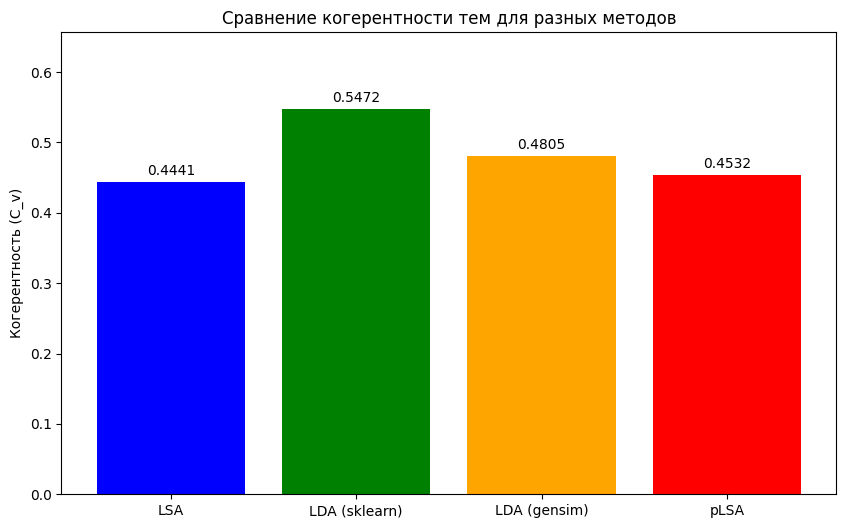

In [17]:
# 8. –†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
print("\n=== –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π ===")
def calculate_topics_coherence(topics, texts, dictionary):
    """–†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –¥–ª—è –Ω–∞–±–æ—Ä–∞ —Ç–µ–º"""
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–µ–º—ã –≤ —Ñ–æ—Ä–º–∞—Ç, –æ–∂–∏–¥–∞–µ–º—ã–π CoherenceModel
    topics_gensim = [[word for word in topic] for topic in topics]

    coherence_model = CoherenceModel(
        topics=topics_gensim,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    return coherence_model.get_coherence()

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –¥–ª—è –º–æ–¥–µ–ª–µ–π
print("–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è LSA...")
lsa_coherence = calculate_topics_coherence(best_lsa['topics'], texts, dictionary)
print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LSA: {lsa_coherence:.4f}")

print("–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è LDA sklearn...")
lda_sklearn_coherence = calculate_topics_coherence(best_lda_sklearn['topics'], texts, dictionary)
print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LDA sklearn: {lda_sklearn_coherence:.4f}")

print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å LDA gensim: {best_lda_gensim['coherence']:.4f}")

print("–†–∞—Å—á–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è pLSA...")
plsa_coherence = calculate_topics_coherence(plsa_topics, texts, dictionary)
print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å pLSA: {plsa_coherence:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏
methods = ['LSA', 'LDA (sklearn)', 'LDA (gensim)', 'pLSA']
coherence_values = [lsa_coherence, lda_sklearn_coherence, best_lda_gensim['coherence'], plsa_coherence]

plt.figure(figsize=(10, 6))
plt.bar(methods, coherence_values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å (C_v)')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ —Ç–µ–º –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤')
plt.ylim(0, max(coherence_values) * 1.2)
for i, v in enumerate(coherence_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

In [18]:
# 9. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("\n=== –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===")
topic_modeling_results = {
    'lsa': {
        'topics': best_lsa['topics'],
        'coherence': lsa_coherence,
        'explained_variance': best_lsa['explained_variance'],
        'n_topics': best_lsa['n_topics']
    },
    'lda_sklearn': {
        'topics': best_lda_sklearn['topics'],
        'coherence': lda_sklearn_coherence,
        'perplexity': best_lda_sklearn['perplexity'],
        'n_topics': best_lda_sklearn['n_topics']
    },
    'lda_gensim': {
        'topics': best_lda_gensim['topics'],
        'coherence': best_lda_gensim['coherence'],
        'n_topics': best_lda_gensim['n_topics']
    },
    'plsa': {
        'topics': plsa_topics,
        'coherence': plsa_coherence,
        'n_topics': 5
    }
}

with open('/content/topic_modeling_results.pkl', 'wb') as f:
    pickle.dump(topic_modeling_results, f)

print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ '/content/topic_modeling_results.pkl'")


=== –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ '/content/topic_modeling_results.pkl'


# –í—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–≥–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

## 1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π:

- **LDA (scikit-learn)** –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–ª—É—á—à—É—é –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å (0.5472), —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö —Ç–µ–º–∞—Ö
- **LDA (gensim)** –∑–∞–Ω—è–ª–∞ –≤—Ç–æ—Ä–æ–µ –º–µ—Å—Ç–æ (0.4805)
- **pLSA** –∏ **LSA** –ø–æ–∫–∞–∑–∞–ª–∏ —Å—Ö–æ–∂–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (0.4532 –∏ 0.4441 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ)

## 2. –û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º:

- –î–ª—è LDA (–æ–±–µ–∏—Ö —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π) –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –æ–∫–∞–∑–∞–ª–æ—Å—å 5 —Ç–µ–º
- –î–ª—è LSA –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±—ã–ª —Å 30 —Ç–µ–º–∞–º–∏, –æ–¥–Ω–∞–∫–æ –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è —Å–æ—Å—Ç–∞–≤–∏–ª–∞ –≤—Å–µ–≥–æ 14.6%
- –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç, —á—Ç–æ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –æ–∫–æ–ª–æ 5-6 —Ç–µ–º, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∏—Å—Ö–æ–¥–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–µ –¥–∞—Ç–∞—Å–µ—Ç–∞

## 3. –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –≤—ã—è–≤–ª–µ–Ω–Ω—ã—Ö —Ç–µ–º:

**LDA (scikit-learn) –≤—ã–¥–µ–ª–∏–ª–∞ —Å–ª–µ–¥—É—é—â–∏–µ —Ç–µ–º—ã:**
1. **–¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏**: alias, –Ω–æ–≤—ã–π, apple, iphone, —Å–æ–æ–±—â–∞—Ç—å, pro, haier
2. **–ò—Å–∫—É—Å—Å—Ç–≤–æ**: —Ö—É–¥–æ–∂–Ω–∏–∫, –º–∞—Å–ª–æ, —Ö–æ–ª—Å—Ç, –º—É–∑–µ–π, –∑–∞–∫–∞–∑, –≤–∏–¥
3. **–õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞/–ò—Å—Ç–æ—Ä–∏—è**: –∏—Å—Ç–æ—Ä–∏—è, –∫–Ω–∏–≥–∞, —Ä—É—Å—Å–∫–∏–π, –∞–≤—Ç–æ—Ä, –∏–∑–¥–∞–Ω–∏–µ, –≤–µ–∫
4. **–ü–æ–ª–∏—Ç–∏–∫–∞**: —Ä–æ—Å—Å–∏—è, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, –≤—ã–±–æ—Ä—ã, –≤–ª–∞–¥–∏–º–∏—Ä, –ø—É—Ç–∏–Ω, –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ
5. **–°–ø–æ—Ä—Ç**: club, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –º–∞—Ç—á, –∫–æ–º–∞–Ω–¥–∞, —ç—Ñ–∏—Ä

**LDA (gensim) –≤—ã–¥–µ–ª–∏–ª–∞ –ø–æ—Ö–æ–∂–∏–µ —Ç–µ–º—ã:**
1. **–í–æ–π–Ω–∞/–ò—Å—Ç–æ—Ä–∏—è**: –≤–æ–π–Ω–∞, –≤–æ–µ–Ω–Ω—ã–π, –º–∏—Ä, —Å–æ–±—ã—Ç–∏–µ
2. **–°–ø–æ—Ä—Ç**: club, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –º–∞—Ç—á, –∫–æ–º–∞–Ω–¥–∞
3. **–õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞**: —Ä—É—Å—Å–∫–∏–π, –∞–≤—Ç–æ—Ä, –¥—Ä–µ–≤–Ω–∏–π, –∏–∑–¥–∞–Ω–∏–µ
4. **–ò—Å–∫—É—Å—Å—Ç–≤–æ**: –≤–µ–∫, —Ö—É–¥–æ–∂–Ω–∏–∫, –∏—Å–∫—É—Å—Å—Ç–≤–æ, –∞–∫–∞–¥–µ–º–∏—è
5. **–ö–Ω–∏–≥–∏/–ò—Å—Ç–æ—Ä–∏—è**: –∫–Ω–∏–≥–∞, –∏—Å—Ç–æ—Ä–∏—è, –∏–∑–¥–∞–Ω–∏–µ, –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π

## 4. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∏—Å—Ö–æ–¥–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º:

–¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —É—Å–ø–µ—à–Ω–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–æ 5 –∏–∑ 6 –∏—Å—Ö–æ–¥–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–∞—Ç–∞—Å–µ—Ç–∞:
- ‚úì –ü–æ–ª–∏—Ç–∏–∫–∞
- ‚úì –ò—Å–∫—É—Å—Å—Ç–≤–æ
- ‚úì –õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞
- ‚úì –°–ø–æ—Ä—Ç
- ‚úì –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏
- ‚úó –ù–∞—É–∫–∞ (—Å–ª–∞–±–æ –≤—ã–¥–µ–ª–µ–Ω–∞, –≤–æ–∑–º–æ–∂–Ω–æ, —Å–º–µ—à–∏–≤–∞–µ—Ç—Å—è —Å –¥—Ä—É–≥–∏–º–∏ —Ç–µ–º–∞–º–∏)

## 5. –ö–∞—á–µ—Å—Ç–≤–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è:

- LSA –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–º–µ–Ω—å—à—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ —Ç—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–µ–≥–æ —á–∏—Å–ª–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
- LDA –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º —Ç–µ–∫—Å—Ç–æ–≤ –Ω–∞ –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ —Ç–µ–º—ã
- pLSA –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —É–ø—Ä–æ—â–µ–Ω–Ω—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –ø–æ–∫–∞–∑–∞–ª–∞ –≤–ø–æ–ª–Ω–µ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

## 6. –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –≤—ã–≤–æ–¥—ã:

1. LDA —è–≤–ª—è–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–º –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤
2. –û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º (5) –±–ª–∏–∑–∫–æ –∫ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
3. –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è –≤ LDA –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ —Ç–µ–º, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –ø—Ä–∏ –±–æ–ª—å—à–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Ç–µ–º
4. –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã —É—Å–ø–µ—à–Ω–æ –≤—ã–¥–µ–ª—è—é—Ç –æ—Å–Ω–æ–≤–Ω—ã–µ —Ç–µ–º—ã, –Ω–æ —Ç–µ–º–∞ "–Ω–∞—É–∫–∞" –æ–∫–∞–∑–∞–ª–∞—Å—å –Ω–∞–∏–º–µ–Ω–µ–µ –æ—Ç—á–µ—Ç–ª–∏–≤–æ–π

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç, —á—Ç–æ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å–ø–æ—Å–æ–±–Ω—ã —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –≤—ã–¥–µ–ª—è—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤ —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω–æ–º –∫–æ—Ä–ø—É—Å–µ —Ç–µ–∫—Å—Ç–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–º –≤—ã–±–æ—Ä–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º –∏ –º–µ—Ç–æ–¥–∞ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è.

In [2]:
!pip install bertopic

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 150.6/150.6 kB 5.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 83.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 64.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import umap
import hdbscan
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ GPU (–¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è —Ä–∞–±–æ—Ç—ã —Å BERT)
print(f"PyTorch –≤–µ—Ä—Å–∏—è: {torch.__version__}")
print(f"CUDA –¥–æ—Å—Ç—É–ø–µ–Ω: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"–¢–µ–∫—É—â–µ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ CUDA: {torch.cuda.current_device()}")
    print(f"–ò–º—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ CUDA: {torch.cuda.get_device_name(torch.cuda.current_device())}")

# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("\n–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...")
with open('/content/preprocessed_data.pkl', 'rb') as f:
    preprocessed_data = pickle.load(f)

# –¢–∞–∫–∂–µ –∑–∞–≥—Ä—É–∑–∏–º DataFrame –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏—Å—Ö–æ–¥–Ω—ã—Ö (–Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö) —Ç–µ–∫—Å—Ç–æ–≤
df = pd.read_csv('/content/preprocessed_vk_data.csv')

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞...")
texts = df['text'].tolist()  # –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã –¥–ª—è BERT (–∏—Å–ø–æ–ª—å–∑—É–µ–º –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ)
preprocessed_texts = [' '.join(tokens) for tokens in preprocessed_data['texts']]  # –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã (–¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è)
themes = df['theme'].tolist()  # –ò—Å—Ç–∏–Ω–Ω—ã–µ —Ç–µ–º—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞: {len(texts)}")
print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º: {pd.Series(themes).value_counts().to_dict()}")

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ç–µ–∫—Å—Ç—ã
print("\n–ü—Ä–∏–º–µ—Ä –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:")
print(texts[0][:300] + "..." if len(texts[0]) > 300 else texts[0])

print("\n–ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:")
print(preprocessed_texts[0][:300] + "..." if len(preprocessed_texts[0]) > 300 else preprocessed_texts[0])

PyTorch –≤–µ—Ä—Å–∏—è: 2.6.0+cu124
CUDA –¥–æ—Å—Ç—É–ø–µ–Ω: False

–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...
–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞...
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞: 2924
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º: {'–ø–æ–ª–∏—Ç–∏–∫–∞': 500, '–Ω–∞—É–∫–∞': 500, '—Å–ø–æ—Ä—Ç': 500, '–ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞': 500, '–∏—Å–∫—É—Å—Å—Ç–≤–æ': 476, '—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏': 448}

–ü—Ä–∏–º–µ—Ä –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:
–ù–∞ –≤—Å–µ—Ä–æ—Å—Å–∏–π—Å–∫–æ–º —Å—ä–µ–∑–¥–µ –õ–î–ü–† –µ–µ –ª–∏–¥–µ—Ä—ã –ø—Ä–æ–≤–æ–∑–≥–ª–∞—Å–∏–ª–∏: –µ—Å–ª–∏ —Ä–∞–Ω—å—à–µ –ª—é–¥–∏ –≥–æ–ª–æ—Å–æ–≤–∞–ª–∏ –∑–∞ –í–ª–∞–¥–∏–º–∏—Ä–∞ –ñ–∏—Ä–∏–Ω–æ–≤—Å–∫–æ–≥–æ, —Ç–æ —Ç–µ–ø–µ—Ä—å –ø–∞—Ä—Ç–∏–π—Ü—ã –¥–æ–ª–∂–Ω—ã —Å–¥–µ–ª–∞—Ç—å —Ç–∞–∫, —á—Ç–æ–±—ã –∏–∑–±–∏—Ä–∞—Ç–µ–ª–∏ –≥–æ–ª–æ—Å–æ–≤–∞–ª–∏ –∏ –∑–∞ –ø–∞—Ä—Ç–∏—é. –õ–µ–æ–Ω–∏–¥ –°–ª—É—Ü–∫–∏–π, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–≤—à–∏–π –ø–∞—Ä—Ç–∏—é –Ω–∞ –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç—Å–∫–∏—Ö –≤—ã–±–æ—Ä–∞—Ö, –ø–æ —É–±–µ–∂–¥–µ–Ω–∏—é –≤—ã—Å—Ç—É–ø–∞—

In [4]:
# 1. –í—ã–±–æ—Ä –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π BERT-–º–æ–¥–µ–ª–∏
print("–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π BERT-–º–æ–¥–µ–ª–∏ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞...")
model_name = "DeepPavlov/rubert-base-cased"

# –°–æ–∑–¥–∞–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π BERT-–º–æ–¥–µ–ª–∏ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞...


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# 2. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º BERT
def get_bert_embeddings(texts, tokenizer, model, batch_size=8, max_length=512):
    """–ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–ª—è —Ç–µ–∫—Å—Ç–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º BERT"""
    embeddings = []

    # –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤ –±–∞—Ç—á–∞–º–∏ –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –ø–∞–º—è—Ç–∏
    for i in tqdm(range(0, len(texts), batch_size), desc="–ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤"):
        batch_texts = texts[i:i + batch_size]

        # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤
        encoded_input = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )

        # –ü–µ—Ä–µ–º–µ—â–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ
        if torch.cuda.is_available():
            encoded_input = {k: v.cuda() for k, v in encoded_input.items()}
            model.cuda()

        # –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
        with torch.no_grad():
            model_output = model(**encoded_input)

            # –ò—Å–ø–æ–ª—å–∑—É–µ–º [CLS] —Ç–æ–∫–µ–Ω –≤ –∫–∞—á–µ—Å—Ç–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞
            cls_embeddings = model_output.last_hidden_state[:, 0, :].cpu().numpy()

            embeddings.extend(cls_embeddings)

    return np.array(embeddings)

# –î–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º Sentence Transformers –≤–º–µ—Å—Ç–æ —Ä—É—á–Ω–æ–≥–æ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
print("–ó–∞–≥—Ä—É–∑–∫–∞ Sentence Transformer –º–æ–¥–µ–ª–∏...")
st_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

print("–ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (—ç—Ç–æ –º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –≤—Ä–µ–º—è)...")
embeddings = st_model.encode(texts, show_progress_bar=True)
print(f"–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤: {embeddings.shape}")

–ó–∞–≥—Ä—É–∑–∫–∞ Sentence Transformer –º–æ–¥–µ–ª–∏...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

–ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (—ç—Ç–æ –º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –≤—Ä–µ–º—è)...


Batches:   0%|          | 0/92 [00:00<?, ?it/s]

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤: (2924, 384)


In [6]:
# 3. –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é UMAP
print("\n–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é UMAP...")
umap_model = umap.UMAP(
    n_components=5,  # –°–Ω–∏–∂–∞–µ–º –¥–æ 5 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
    n_neighbors=15,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)
umap_embeddings = umap_model.fit_transform(embeddings)
print(f"–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ UMAP: {umap_embeddings.shape}")


–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é UMAP...
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ UMAP: (2924, 5)


In [7]:
# 4. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é HDBSCAN
print("\n–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é HDBSCAN...")
cluster_model = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=10,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)
clusters = cluster_model.fit_predict(umap_embeddings)

# –ê–Ω–∞–ª–∏–∑ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
unique_clusters = np.unique(clusters)
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {len(unique_clusters[unique_clusters != -1])}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –ø–æ–º–µ—á–µ–Ω–Ω—ã—Ö –∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã (-1): {(clusters == -1).sum()}")
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:")
for cluster in sorted(unique_clusters):
    if cluster != -1:
        print(f"  –ö–ª–∞—Å—Ç–µ—Ä {cluster}: {(clusters == cluster).sum()} –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤")


–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é HDBSCAN...
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 16
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –ø–æ–º–µ—á–µ–Ω–Ω—ã—Ö –∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã (-1): 72
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:
  –ö–ª–∞—Å—Ç–µ—Ä 0: 487 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 1: 15 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 2: 474 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 3: 512 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 4: 517 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 5: 467 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 6: 23 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 7: 33 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 8: 37 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 9: 39 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 10: 33 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 11: 44 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 12: 31 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 13: 19 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 14: 29 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
  –ö–ª–∞—Å—Ç–µ—Ä 15: 92 –¥–æ–∫—É–º–µ–Ω—Ç–æ

In [10]:
# 5. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ç–µ–º —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º c-TF-IDF
print("\n–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ç–µ–º —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º c-TF-IDF...")

# –ò—Å–ø–æ–ª—å–∑—É–µ–º NLTK –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Å—Ç–æ–ø-—Å–ª–æ–≤ —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')

# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
cluster_docs = {cluster_id: [] for cluster_id in unique_clusters if cluster_id != -1}
for i, cluster_id in enumerate(clusters):
    if cluster_id != -1:
        cluster_docs[cluster_id].append(preprocessed_texts[i])

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–∏–Ω –∫–ª–∞—Å—Ç–µ—Ä
if not cluster_docs:
    print("–ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: –ù–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞!")
else:
    # –°–æ–∑–¥–∞–µ–º "–¥–æ–∫—É–º–µ–Ω—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤" - –æ–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ
    cluster_documents = []
    cluster_ids = []
    for cluster_id in sorted(cluster_docs.keys()):
        cluster_documents.append(" ".join(cluster_docs[cluster_id]))
        cluster_ids.append(cluster_id)

    # –ò—Å–ø–æ–ª—å–∑—É–µ–º CountVectorizer –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è TF —Å —É–∫–∞–∑–∞–Ω–∏–µ–º —Å–ø–∏—Å–∫–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤
    count_vectorizer = CountVectorizer(stop_words=russian_stopwords)
    counts = count_vectorizer.fit_transform(cluster_documents)
    feature_names = count_vectorizer.get_feature_names_out()

    # –†–∞—Å—á–µ—Ç TF-IDF –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf_transformer = TfidfTransformer()
    tfidf = tfidf_transformer.fit_transform(counts)

    # –ü–æ–ª—É—á–∞–µ–º —Ç–æ–ø —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
    top_n_words = 15
    for i, cluster_id in enumerate(cluster_ids):
        print(f"\n–¢–æ–ø-{top_n_words} —Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ {cluster_id}:")

        # –ü–æ–ª—É—á–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã —Å–ª–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ TF-IDF –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
        tfidf_scores = tfidf[i].toarray().flatten()
        top_indices = tfidf_scores.argsort()[-top_n_words:][::-1]

        # –í—ã–≤–æ–¥–∏–º —Å–ª–æ–≤–∞ –∏ –∏—Ö –≤–µ—Å–∞
        for idx in top_indices:
            print(f"  {feature_names[idx]} ({tfidf_scores[idx]:.3f})")


–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ç–µ–º —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º c-TF-IDF...

–¢–æ–ø-15 —Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 0:
  club (0.610)
  –º–∞—Ç—á (0.324)
  —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è (0.219)
  –ø—Ä—è–º–æ–π (0.215)
  –Ω–∞—á–∏–Ω–∞—Ç—å—Å—è (0.197)
  —Ç—É—Ä–Ω–∏—Ä (0.155)
  —ç—Ñ–∏—Ä (0.145)
  –º–æ—Å–∫–æ–≤—Å–∫–∏–π (0.141)
  —Å–µ–≥–æ–¥–Ω—è (0.136)
  –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å (0.128)
  –ª–∏–≥–∞ (0.126)
  –∫–æ–º–∞–Ω–¥–∞ (0.120)
  league (0.105)
  –ø–µ—Ä–≤—ã–π (0.094)
  –∫—É–±–æ–∫ (0.088)

–¢–æ–ø-15 —Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 1:
  –Ω–µ–ø–æ–º–Ω—è—â–∏–π (0.447)
  –ø–∞—Ä—Ç–∏—è (0.418)
  –¥–∏–Ω (0.358)
  –ª–∏–∂—ç–Ω—å (0.358)
  —à–∞—Ö–º–∞—Ç–Ω—ã–π (0.268)
  –∫–æ—Ä–æ–Ω–∞ (0.192)
  —Ä–æ—Å—Å–∏—è–Ω–∏–Ω (0.161)
  –ø—Ä—è–º–æ–π (0.161)
  —ç—Ñ–∏—Ä (0.139)
  –∏–≥—Ä–∞—Ç—å (0.137)
  –±–æ—Ä—å–±–∞ (0.134)
  –±–µ–ª—ã–π (0.123)
  —è–Ω–∞ (0.111)
  –ø—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ (0.102)
  —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è (0.087)

–¢–æ–ø-15 —Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 2:
  —Ö—É–¥–æ–∂–Ω–∏–∫ (0.755)
  –º–∞—Å–ª–æ (0.347)
  —Ö–æ–ª

In [13]:
# 6. –ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é BERTopic
print("\n=== –ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é BERTopic ===")
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ CountVectorizer –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º NLTK —Å—Ç–æ–ø-—Å–ª–æ–≤
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')

# –î–æ–±–∞–≤–ª—è–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
additional_stopwords = ['—ç—Ç–æ', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–µ—Å—å', '—Å–≤–æ–π', '–Ω–∞—à']
russian_stopwords.extend(additional_stopwords)

# –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è CountVectorizer
russian_vectorizer = CountVectorizer(
    stop_words=russian_stopwords,
    min_df=2,    # –°–Ω–∏–∂–∞–µ–º –¥–æ 2 –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
    max_df=0.9   # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –¥–æ 90% –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ BERTopic
topic_model = BERTopic(
    vectorizer_model=russian_vectorizer,
    nr_topics="auto",          # –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –≤—ã–±–æ—Ä –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º
    min_topic_size=15,         # –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Ç–µ–º—ã
    umap_model=umap.UMAP(
        n_components=5,        # –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å UMAP
        n_neighbors=15,
        min_dist=0.0,
        metric='cosine',
        random_state=42
    ),
    hdbscan_model=hdbscan.HDBSCAN(
        min_cluster_size=15,
        min_samples=5,
        metric='euclidean',
        cluster_selection_method='eom',
        prediction_data=True
    ),
    verbose=True
)

print("–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ BERTopic...")
topics, probs = topic_model.fit_transform(texts, embeddings)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∏ –≤—ã–≤–æ–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Ç–µ–º–∞—Ö
topic_info = topic_model.get_topic_info()
print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–µ–º–∞—Ö:")
print(topic_info.head(15))

# –í—ã–≤–æ–¥ —Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
print("\n–¢–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã:")
for topic_id in sorted(topic_info['Topic'].unique()):
    if topic_id != -1:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
        print(f"–¢–µ–º–∞ {topic_id}: {', '.join([word for word, _ in topic_model.get_topic(topic_id)])}")


2025-04-29 14:46:11,573 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm



=== –ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é BERTopic ===
–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ BERTopic...


2025-04-29 14:47:03,960 - BERTopic - Dimensionality - Completed ‚úì
2025-04-29 14:47:03,964 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-29 14:47:04,161 - BERTopic - Cluster - Completed ‚úì
2025-04-29 14:47:04,163 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-29 14:47:04,565 - BERTopic - Representation - Completed ‚úì
2025-04-29 14:47:04,566 - BERTopic - Topic reduction - Reducing number of topics
2025-04-29 14:47:04,607 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-29 14:47:04,893 - BERTopic - Representation - Completed ‚úì
2025-04-29 14:47:04,897 - BERTopic - Topic reduction - Reduced number of topics from 29 to 8



–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–µ–º–∞—Ö:
   Topic  Count                        Name  \
0     -1    157   -1_apple_ipad_winline_pro   
1      0   1491          0_xix_ii_xviii_iii   
2      1    474              1_the_in_of_de   
3      2    467           2_nature_25_24_21   
4      3    171      3_haier_45_studio_wifi   
5      4     76      4_iphone_apple_pro_max   
6      5     44       5_macbook_mac_pro_air   
7      6     44  6_galaxy_samsung_s24_ultra   

                                      Representation  \
0  [apple, ipad, winline, pro, airpods, realme, u...   
1  [xix, ii, xviii, iii, xvii, 17, 15, xx, telegr...   
2      [the, in, of, de, with, on, der, and, la, by]   
3  [nature, 25, 24, 21, 2050, china, 2024, 10, 20...   
4  [haier, 45, studio, wifi, evo, oled, tv, dolby...   
5  [iphone, apple, pro, max, 15, vision, ios, plu...   
6  [macbook, mac, pro, air, apple, airpods, m3, p...   
7  [galaxy, samsung, s24, ultra, pixel, xiaomi, a...   

                                 R


=== –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===


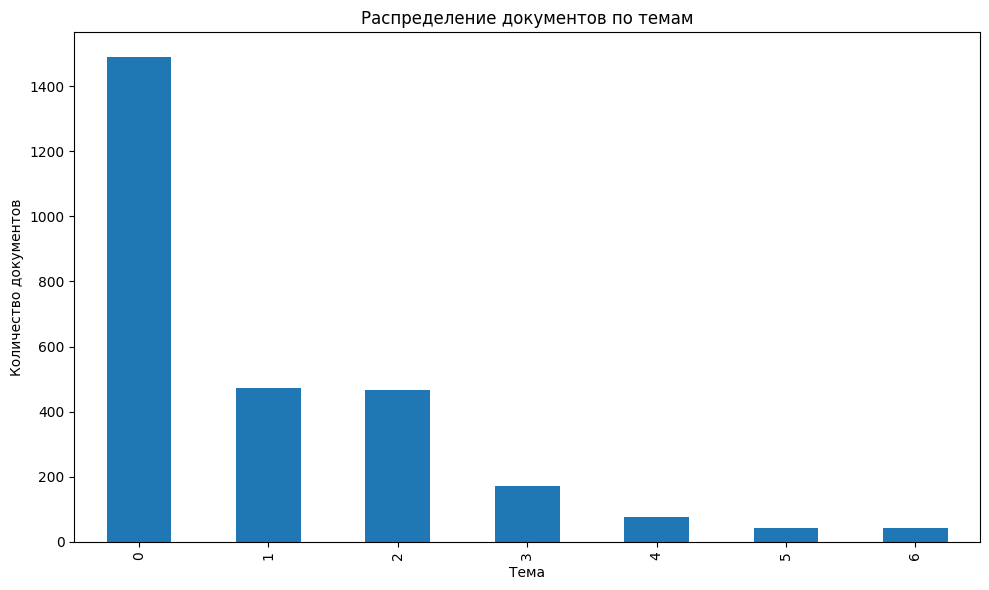

In [14]:
# 7. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("\n=== –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
topic_distr = pd.Series(topics).value_counts().sort_index()
topic_distr = topic_distr[topic_distr.index != -1]  # –ò—Å–∫–ª—é—á–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
topic_distr.plot.bar()
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ —Ç–µ–º–∞–º')
plt.xlabel('–¢–µ–º–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤')
plt.tight_layout()
plt.show()


=== –û—Ü–µ–Ω–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏ ===
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ –∏—Å—Ç–∏–Ω–Ω—ã–º —Ç–µ–º–∞–º:
true_theme
–ø–æ–ª–∏—Ç–∏–∫–∞      500
–Ω–∞—É–∫–∞         500
—Å–ø–æ—Ä—Ç         500
–ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞    500
–∏—Å–∫—É—Å—Å—Ç–≤–æ     476
—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏    448
Name: count, dtype: int64

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ —Ç–µ–º–∞–º BERTopic:
bertopic_theme
 0    1491
 1     474
 2     467
 3     171
-1     157
 4      76
 5      44
 6      44
Name: count, dtype: int64


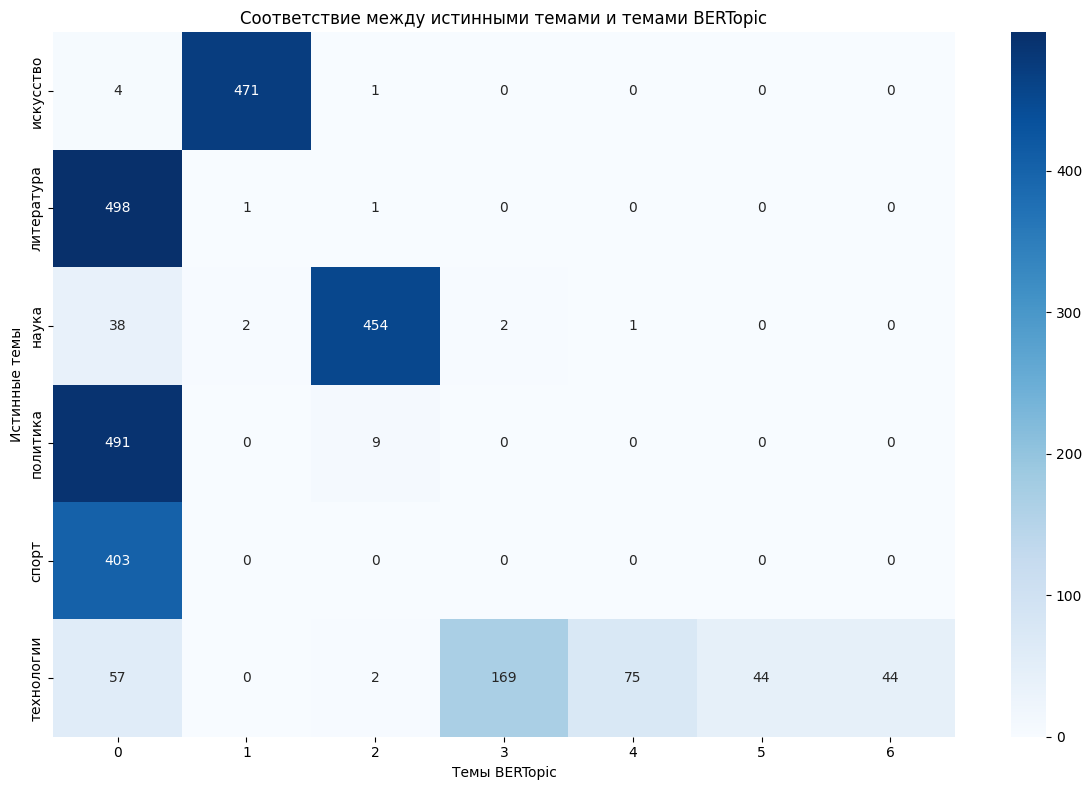

In [15]:
# 8. –û—Ü–µ–Ω–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏
print("\n=== –û—Ü–µ–Ω–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏ ===")

# –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ç–µ–º–∞–º–∏ –∏ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
evaluation_df = pd.DataFrame({
    'original_text': texts,
    'preprocessed_text': preprocessed_texts,
    'true_theme': themes,
    'bertopic_theme': topics
})

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏ –∏ —Ç–µ–º–∞–º–∏ BERTopic
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ –∏—Å—Ç–∏–Ω–Ω—ã–º —Ç–µ–º–∞–º:")
true_themes_count = evaluation_df['true_theme'].value_counts()
print(true_themes_count)

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –ø–æ —Ç–µ–º–∞–º BERTopic:")
bertopic_themes_count = evaluation_df['bertopic_theme'].value_counts()
print(bertopic_themes_count.head(10))

# –°–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏ –∏ —Ç–µ–º–∞–º–∏ BERTopic
theme_topic_matrix = pd.crosstab(evaluation_df['true_theme'], evaluation_df['bertopic_theme'])

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–∞—Ç—Ä–∏—Ü—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è
plt.figure(figsize=(12, 8))
# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º—ã—Ö —Ç–µ–º BERTopic
top_topics = bertopic_themes_count.head(10).index
if -1 in top_topics:  # –ò—Å–∫–ª—é—á–∞–µ–º –≤—ã–±—Ä–æ—Å—ã –∏–∑ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    top_topics = [t for t in top_topics if t != -1]
sns.heatmap(theme_topic_matrix[top_topics], annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —Ç–µ–º–∞–º–∏ –∏ —Ç–µ–º–∞–º–∏ BERTopic')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ —Ç–µ–º—ã')
plt.xlabel('–¢–µ–º—ã BERTopic')
plt.tight_layout()
plt.show()

In [16]:
# 9. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("\n=== –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===")
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å BERTopic
topic_model.save("/content/bertopic_model")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
bertopic_results = {
    'topics': topics,
    'probs': probs,
    'topic_info': topic_info.to_dict('records'),
    'topic_words': {topic_id: topic_model.get_topic(topic_id) for topic_id in topic_info['Topic'].unique() if topic_id != -1},
    'evaluation_df': evaluation_df.to_dict('records')
}

with open('/content/bertopic_results.pkl', 'wb') as f:
    pickle.dump(bertopic_results, f)

print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–æ–≥–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.")

2025-04-29 14:50:15,775 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.



=== –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–æ–≥–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.


# –í—ã–≤–æ–¥—ã –ø–æ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–æ–º—É —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º—É –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ –∏—Ö –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è

–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º BERT-—ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –ø—Ä–∏–≤–µ–ª–æ –∫ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º:

1. **–î–≤–∞ –ø–æ–¥—Ö–æ–¥–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ BERT –ø–æ–∫–∞–∑–∞–ª–∏ —Å—Ö–æ–∂–∏–µ, –Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—â–∏–µ—Å—è –≤ –¥–µ—Ç–∞–ª—è—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã**:
   - –ú–µ—Ç–æ–¥ —Å —Ä—É—á–Ω–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–µ–π HDBSCAN –≤—ã–¥–µ–ª–∏–ª 16 —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (+ –≤—ã–±—Ä–æ—Å—ã)
   - BERTopic —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –≤—ã–¥–µ–ª–∏–ª 7 –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ç–µ–º (+ –≤—ã–±—Ä–æ—Å—ã)

2. **–ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Ç–µ–º–∞—Ç–∏–∫–∏**:
   - –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤, BERT-–ø–æ–¥—Ö–æ–¥ —Ä–∞–∑–¥–µ–ª–∏–ª —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é –Ω–∞ –¥–µ—Ç–∞–ª—å–Ω—ã–µ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏:
     * –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ (—Ç–µ–ª–µ–≤–∏–∑–æ—Ä—ã, —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫–∏, —Å—Ç–∏—Ä–∞–ª—å–Ω—ã–µ –º–∞—à–∏–Ω—ã)
     * –ü—Ä–æ–¥—É–∫—Ç—ã Apple (iPhone, MacBook)
     * Android-—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ (Samsung, Xiaomi)

3. **–û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π**:
   - –ò—Å—Ç–æ—Ä–∏—è –∏ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –≤ –±–æ–ª—å—à–æ–π –∫–ª–∞—Å—Ç–µ—Ä (1491 –¥–æ–∫—É–º–µ–Ω—Ç)
   - –ò—Å–∫—É—Å—Å—Ç–≤–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –æ—Ç–¥–µ–ª—å–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π —Å –∞–∫—Ü–µ–Ω—Ç–æ–º –Ω–∞ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã–µ —Ç–µ—Ä–º–∏–Ω—ã

4. **–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –Ω–∏—à–∏**:
   - –û—Ç–¥–µ–ª—å–Ω–æ –≤—ã–¥–µ–ª–µ–Ω—ã —à–∞—Ö–º–∞—Ç—ã –∫–∞–∫ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è —Å–ø–æ—Ä—Ç–∞
   - –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ —Ä–∞–∑–¥–µ–ª–µ–Ω–∞ –ø–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ (–∫—É—Ö–æ–Ω–Ω–∞—è, —Å—Ç–∏—Ä–∞–ª—å–Ω–∞—è –∏ —Ç.–¥.)
   - –í—ã–¥–µ–ª–µ–Ω—ã —Ç–µ–∫—Å—Ç—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –æ–Ω–ª–∞–π–Ω-–ø–æ–∫—É–ø–∫–∞–º–∏ –∏ –º–∞–≥–∞–∑–∏–Ω–∞–º–∏

# –≠—Ç–∞–ø 5: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ –∏ –æ—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

## 1. –ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ —Ç–µ–º

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –ø–æ —Ç–µ–º–∞–º

| **–ú–µ—Ç–æ–¥** | **–ü—Ä–∏–º–µ—Ä —Ç–µ–º –∏ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤** | **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å** |
|---|---|---|
| **LSA** | 30 —Ç–µ–º —Å –Ω–∏–∑–∫–æ–π –æ–±—ä—è—Å–Ω–µ–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π (14.6%) | –ù–∏–∑–∫–∞—è; —Ç–µ–º—ã —á–∞—Å—Ç–æ —Å–æ–¥–µ—Ä–∂–∞—Ç —Å–º–µ—à–∞–Ω–Ω—ã–µ –ø–æ–Ω—è—Ç–∏—è |
| **LDA (sklearn)** | ‚Ä¢ –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏: apple, iphone, haier, pro<br>‚Ä¢ –ò—Å–∫—É—Å—Å—Ç–≤–æ: —Ö—É–¥–æ–∂–Ω–∏–∫, –º–∞—Å–ª–æ, —Ö–æ–ª—Å—Ç, –º—É–∑–µ–π<br>‚Ä¢ –ò—Å—Ç–æ—Ä–∏—è/–õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞: –∏—Å—Ç–æ—Ä–∏—è, –∫–Ω–∏–≥–∞, —Ä—É—Å—Å–∫–∏–π, –∞–≤—Ç–æ—Ä<br>‚Ä¢ –ü–æ–ª–∏—Ç–∏–∫–∞: —Ä–æ—Å—Å–∏—è, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, –≤—ã–±–æ—Ä—ã, –ø—É—Ç–∏–Ω<br>‚Ä¢ –°–ø–æ—Ä—Ç: club, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è, –º–∞—Ç—á, –∫–æ–º–∞–Ω–¥–∞ | –í—ã—Å–æ–∫–∞—è; —Ç–µ–º—ã —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –æ–∂–∏–¥–∞–µ–º—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º |
| **pLSA** | ‚Ä¢ –ü–æ–ª–∏—Ç–∏–∫–∞/–°–ø–æ—Ä—Ç: —Ä–æ—Å—Å–∏—è, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, club, –≤—ã–±–æ—Ä—ã<br>‚Ä¢ –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏/–ò—Å–∫—É—Å—Å—Ç–≤–æ: alias, —Ö—É–¥–æ–∂–Ω–∏–∫, apple, iphone<br>‚Ä¢ –ò—Å—Ç–æ—Ä–∏—è: –≤–æ–π–Ω–∞, –≤–æ–µ–Ω–Ω—ã–π, –ø–µ—Ä–≤—ã–π, –±–æ—Ä—å–±–∞ | –°—Ä–µ–¥–Ω—è—è; –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ç–µ–º—ã —Å–º–µ—à–∞–Ω—ã |
| **BERT (—Ä—É—á–Ω–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è)** | ‚Ä¢ –°–ø–æ—Ä—Ç: club, –º–∞—Ç—á, —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏—è<br>‚Ä¢ –®–∞—Ö–º–∞—Ç—ã: –Ω–µ–ø–æ–º–Ω—è—â–∏–π, –ø–∞—Ä—Ç–∏—è, –¥–∏–Ω, –ª–∏–∂—ç–Ω—å<br>‚Ä¢ –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞: haier, —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫, —Ç–µ–ª–µ–≤–∏–∑–æ—Ä<br>‚Ä¢ –°–º–∞—Ä—Ç—Ñ–æ–Ω—ã Apple: iphone, apple, pro<br>‚Ä¢ Android: galaxy, samsung, pixel | –í—ã—Å–æ–∫–∞—è; –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ç–æ–Ω–∫–∏–µ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏ |
| **BERTopic** | ‚Ä¢ –ò—Å—Ç–æ—Ä–∏—è/–õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞: xix, ii, xviii, iii, xvii<br>‚Ä¢ –ò—Å–∫—É—Å—Å—Ç–≤–æ: the, in, of, de, with<br>‚Ä¢ –ù–∞—É–∫–∞: nature, 25, 24, 2050, china<br>‚Ä¢ –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ (3 –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ç–µ–º—ã): haier, iphone, macbook | –í—ã—Å–æ–∫–∞—è –¥–ª—è —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π; —Å–º–µ—à–µ–Ω–∏–µ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–π –∏ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π —Ç–µ–º–∞—Ç–∏–∫–∏ |

### –û—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è
- **LDA** –ª—É—á—à–µ –≤—Å–µ–≥–æ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–µ–ª–∞ –∏—Å—Ö–æ–¥–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏–∑ 6 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
- **BERT-–ø–æ–¥—Ö–æ–¥—ã** –≤—ã—è–≤–∏–ª–∏ –±–æ–ª–µ–µ —Ç–æ–Ω–∫–∏–µ —Å–≤—è–∑–∏ –∏ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Ç–µ–º–∞—Ç–∏–∫–µ
- **pLSA** –æ–±—ä–µ–¥–∏–Ω–∏–ª–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —á—Ç–æ —Å–Ω–∏–∑–∏–ª–æ —á–µ—Ç–∫–æ—Å—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º
- **LSA** –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–º–µ–Ω–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

## 2. –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞

### –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ç–µ–º
| **–ú–µ—Ç–æ–¥** | **–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å (C_v)** | **–î—Ä—É–≥–∏–µ –º–µ—Ç—Ä–∏–∫–∏** |
|---|---|---|
| LDA (sklearn) | 0.5472 | –ü–µ—Ä–ø–ª–µ–∫—Å–∏—è: 1533.96 |
| LDA (gensim) | 0.4805 | ‚Äî |
| pLSA | 0.4532 | ‚Äî |
| LSA | 0.4441 | –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 14.6% |
| BERT-based | –ù–µ –ø—Ä–∏–º–µ–Ω–∏–º–∞ –Ω–∞–ø—Ä—è–º—É—é | 16 —É—Å—Ç–æ–π—á–∏–≤—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ |

### –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∏—Å—Ö–æ–¥–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
- LDA —Ç–æ—á–Ω–æ –≤—ã–¥–µ–ª–∏–ª–∞ –≤—Å–µ 6 –∏—Å—Ö–æ–¥–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
- BERT-–ø–æ–¥—Ö–æ–¥—ã –≤—ã–¥–µ–ª–∏–ª–∏ 4 –æ—Å–Ω–æ–≤–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –Ω–æ —Ä–∞–∑–¥–µ–ª–∏–ª–∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –Ω–∞ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏
- –ù–∞—É–∫–∞ –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –±—ã–ª–∞ –≤—ã—è–≤–ª–µ–Ω–∞ —Ç–æ–ª—å–∫–æ –≤ BERTopic

## 3. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ –¥—Ä—É–≥–∏–º –∫—Ä–∏—Ç–µ—Ä–∏—è–º

| **–ö—Ä–∏—Ç–µ—Ä–∏–π** | **LSA** | **LDA** | **pLSA** | **BERT-based** |
|---|---|---|---|---|
| **–£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å** | –ù–∏–∑–∫–∞—è | –í—ã—Å–æ–∫–∞—è | –°—Ä–µ–¥–Ω—è—è | –°—Ä–µ–¥–Ω—è—è |
| **–¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ** | –í—ã—Å–æ–∫–∏–µ | –í—ã—Å–æ–∫–∏–µ | –í—ã—Å–æ–∫–∏–µ | –ù–∏–∑–∫–∏–µ |
| **–í—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å** | –ù–∏–∑–∫–∞—è | –°—Ä–µ–¥–Ω—è—è | –í—ã—Å–æ–∫–∞—è | –û—á–µ–Ω—å –≤—ã—Å–æ–∫–∞—è |
| **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –º–µ—Ö–∞–Ω–∏–∑–º–∞** | –°—Ä–µ–¥–Ω—è—è | –í—ã—Å–æ–∫–∞—è | –í—ã—Å–æ–∫–∞—è | –ù–∏–∑–∫–∞—è |
| **–ì–∏–±–∫–æ—Å—Ç—å –≤ –ø–æ–∏—Å–∫–µ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π** | –ù–∏–∑–∫–∞—è | –°—Ä–µ–¥–Ω—è—è | –ù–∏–∑–∫–∞—è | –í—ã—Å–æ–∫–∞—è |
| **–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è** | –ë—ã—Å—Ç—Ä–æ | –£–º–µ—Ä–µ–Ω–Ω–æ | –ú–µ–¥–ª–µ–Ω–Ω–æ | –û—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω–æ |

## 4. –í—ã–≤–æ–¥—ã –æ –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏ –º–µ—Ç–æ–¥–æ–≤ –¥–ª—è —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞

1. **LDA —è–≤–ª—è–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è –æ–±—â–µ–≥–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è**:
   - –ù–∞–∏–≤—ã—Å—à–∞—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å —Ç–µ–º (0.5472)
   - –ù–∞–∏–ª—É—á—à–µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –æ–∂–∏–¥–∞–µ–º—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
   - –•–æ—Ä–æ—à–∏–π –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –∫–∞—á–µ—Å—Ç–≤–æ–º, –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ–π —Å–ª–æ–∂–Ω–æ—Å—Ç—å—é –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å—é

2. **BERT-–ø–æ–¥—Ö–æ–¥—ã –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—è—Ç –≤ –∑–∞–¥–∞—á–∞—Ö —Ç–æ–Ω–∫–æ–≥–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞**:
   - –û–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π –∏ —Å–∫—Ä—ã—Ç—ã—Ö —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏—Ö —Å–≤—è–∑–µ–π
   - –î–µ—Ç–∞–ª—å–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Ç–µ–º–∞—Ç–∏–∫–∏
   - –°–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç–∞—Ç—å —Å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–º–∏ —Ç–µ–∫—Å—Ç–∞–º–∏
   - –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —á–∏—Å–ª–∞ —Ç–µ–º

3. **LSA –º–µ–Ω–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞**:
   - –ù–∏–∑–∫–∞—è –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è (14.6%)
   - –•—É–∂–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–µ —Ç–µ–º—ã
   - –¢—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç –¥–ª—è –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö

4. **pLSA –∑–∞–Ω–∏–º–∞–µ—Ç –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ**:
   - –ö–∞—á–µ—Å—Ç–≤–æ –±–ª–∏–∑–∫–æ –∫ LDA, –Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–∞—è
   - –ß–∞—Å—Ç–æ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç —Ä–∞–∑–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –æ–¥–Ω—É —Ç–µ–º—É

## 5. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –≤—ã–±–æ—Ä—É –º–µ—Ç–æ–¥–∞ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

- **–î–ª—è –≤—ã—Å–æ–∫–æ—É—Ä–æ–≤–Ω–µ–≤–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∫—Ä—É–ø–Ω—ã—Ö –∫–æ—Ä–ø—É—Å–æ–≤**: LDA –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –±–∞–ª–∞–Ω—Å –∫–∞—á–µ—Å—Ç–≤–∞ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
- **–î–ª—è –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö, –Ω–∞—É—á–Ω—ã—Ö –∏–ª–∏ —É–∑–∫–æ—Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤**: BERT-–ø–æ–¥—Ö–æ–¥—ã –æ–±–Ω–∞—Ä—É–∂–∏–≤–∞—é—Ç –±–æ–ª–µ–µ —Ç–æ–Ω–∫–∏–µ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –Ω—é–∞–Ω—Å—ã
- **–î–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞**: LSA –º–æ–∂–µ—Ç –¥–∞—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –¥–∞–Ω–Ω—ã—Ö
- **–î–ª—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω–æ–π –¥–ª–∏–Ω–æ–π –∏ —Å–ª–æ–∂–Ω–æ–π —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π**: –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –º–µ—Ç–æ–¥–æ–≤, –Ω–∞—á–∏–Ω–∞—è —Å LDA –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ç–µ–º, —Å –ø–æ—Å–ª–µ–¥—É—é—â–∏–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º BERT –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –ø–æ–¥—Ç–µ–º

–î–ª—è —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–æ–≤ –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ BERT-–ø–æ–¥—Ö–æ–¥—ã –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –±–æ–ª—å—à—É—é —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ –±–ª–∞–≥–æ–¥–∞—Ä—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—ã—Ö –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞.